In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import kaggle as kg
import scipy.stats as s
from scipy.stats import shapiro, normaltest, probplot

we imported libraries

In [2]:
os.environ["USERNAME"] = "bhoomijain012"
os.environ["KEY"] = "6f61094e7869c13a95742fdc3ab3afdf"

kaggle api

In [3]:
kg.api.authenticate()

In [ ]:
kg.api.dataset_download_files(dataset="zafarali27/house-price-prediction-dataset",path="./dataset",unzip=True)

downloaded dataset from kaggle

In [4]:
data = pd.read_csv("dataset/House Price Prediction Dataset.csv")

In [5]:
data

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056
...,...,...,...,...,...,...,...,...,...,...
1995,1996,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,1997,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1998,1062,5,1,2,1903,Rural,Poor,No,476925
1998,1999,4062,3,1,2,1936,Urban,Excellent,Yes,161119


In [6]:
data.columns

Index(['Id', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt',
       'Location', 'Condition', 'Garage', 'Price'],
      dtype='object')

In [7]:
data.drop(labels=data.columns[0],axis=1,inplace=True)

In [8]:
data

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056
...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1062,5,1,2,1903,Rural,Poor,No,476925
1998,4062,3,1,2,1936,Urban,Excellent,Yes,161119


In [9]:
data.isna().sum()

Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64

In [10]:
data[data.columns[5]].unique()

array(['Downtown', 'Suburban', 'Urban', 'Rural'], dtype=object)

In [11]:
data[data.columns[6]].unique()

array(['Excellent', 'Good', 'Fair', 'Poor'], dtype=object)

In [12]:
def label_encode_column(column_name):

    data[column_name].unique()

    d = dict()
    for value in data[column_name].unique():
        d[value] = data[data[column_name] == value][data.columns[-1]].mean()

    input_target_df = pd.DataFrame(data={column_name:d.keys(),"Mean Price":d.values()})
    input_target_df.sort_values(by="Mean Price",inplace=True)
    input_target_df.reset_index(inplace=True,drop=True)

    data[column_name] = data[column_name].replace(to_replace=list(input_target_df[column_name]),
                              value=list(input_target_df.index)).infer_objects(copy=False)

In [13]:
categorical_columns = ['Location','Condition','Garage']

In [14]:
categorical_columns

['Location', 'Condition', 'Garage']

In [15]:
for column_name in categorical_columns:

    label_encode_column(column_name)

/tmp/ipykernel_3981/930716832.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[column_name] = data[column_name].replace(to_replace=list(input_target_df[column_name]),


In [16]:
data

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,1,2,0,149919
1,4272,5,4,3,1958,1,2,0,424998
2,3592,2,2,3,1938,1,1,0,266746
3,966,4,2,2,1902,3,3,1,244020
4,4926,1,4,2,1975,1,3,1,636056
...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,3,0,0,295620
1996,3046,5,2,1,2019,3,0,1,580929
1997,1062,5,1,2,1903,2,0,0,476925
1998,4062,3,1,2,1936,0,2,1,161119


In [17]:
data.drop_duplicates(inplace=True,ignore_index=True)


In [18]:
data.shape

(2000, 9)

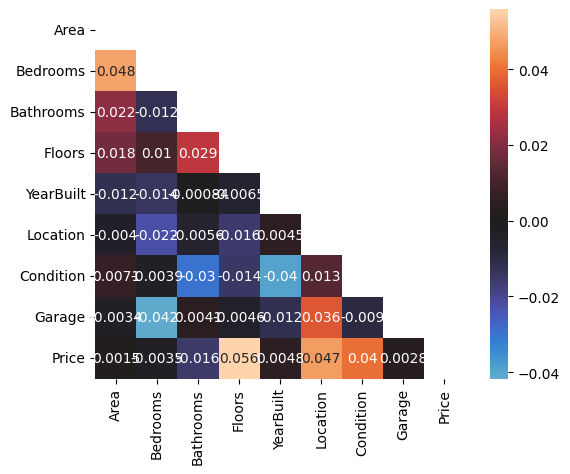

In [19]:
data_corr = data.corr()
upper_traingle_mask = np.triu(np.ones_like(data_corr,dtype=bool))
sns.heatmap(data=data_corr,center=0,annot=True,square=True,xticklabels=True,yticklabels=True,mask=upper_traingle_mask)
plt.show()

In [20]:
selected_features = list(data_corr[data_corr[data.columns[-1]] > 0.01].index)

In [21]:
refined_data = data[selected_features]

In [50]:
refined_data

,Floors,Location,Condition,Price
0,3,1,2,149919
1,3,1,2,424998
2,3,1,1,266746
3,2,3,3,244020
4,2,1,3,636056
...,...,...,...,...
1995,3,3,0,295620
1996,1,3,0,580929
1997,2,2,0,476925
1998,2,0,2,161119


In [55]:
refined_data.shape

(2000, 4)

(array([[2000.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [2000.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [2000.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [ 110.,  202.,  187.,  203.,  198.,  218.,  220.,  199.,  225.,
          238.]]),
 array([     0. ,  99965.6, 199931.2, 299896.8, 399862.4, 499828. ,
        599793.6, 699759.2, 799724.8, 899690.4, 999656. ]),
 <a list of 4 BarContainer objects>)

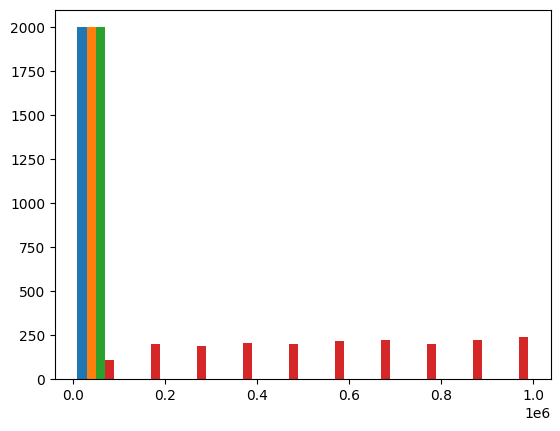

In [23]:
plt.hist(refined_data)

In [ ]:
X = np.array(refined_data.T) #transpose the data, used T for it 
# did it to easy multiplication of matrixes

In [66]:
X.shape

(4, 2000)

In [63]:
Y = np.array(refined_data.iloc[:,-1]).reshape(refined_data.shape[0],1)

In [25]:
Y.shape

(2000, 1)

(array([187., 202., 186., 185., 199., 190., 214., 194., 214., 229.]),
 array([ 50005. , 144970.1, 239935.2, 334900.3, 429865.4, 524830.5,
        619795.6, 714760.7, 809725.8, 904690.9, 999656. ]),
 <BarContainer object of 10 artists>)

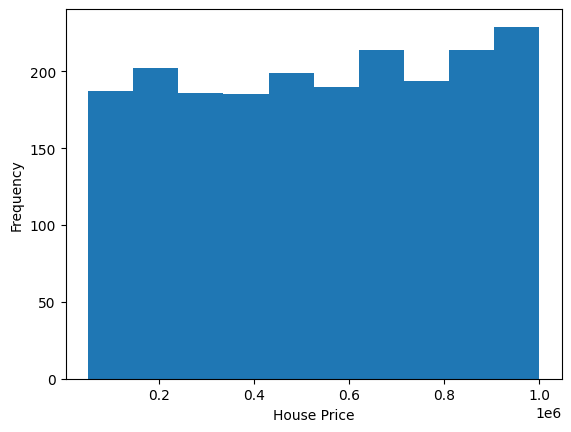

In [26]:
plt.xlabel("House Price")
plt.ylabel("Frequency")
plt.hist(Y)

/tmp/ipykernel_3981/4153277099.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y,fit=s.uniform)


<Axes: xlabel='House Price', ylabel='Density'>

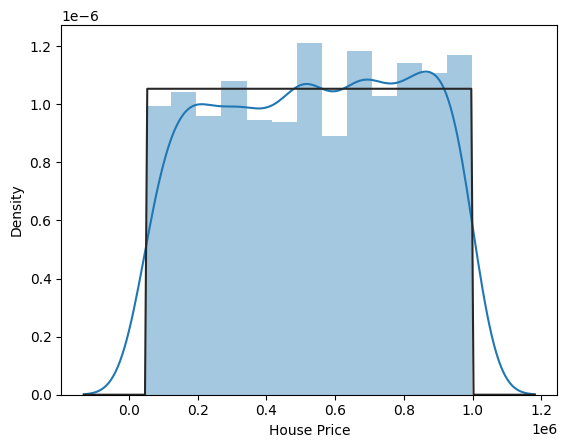

In [27]:
plt.xlabel("House Price")
sns.distplot(Y,fit=s.uniform)

Upper one is more convincing

/tmp/ipykernel_3981/4269672222.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y,fit=s.norm)


<Axes: xlabel='House Price', ylabel='Density'>

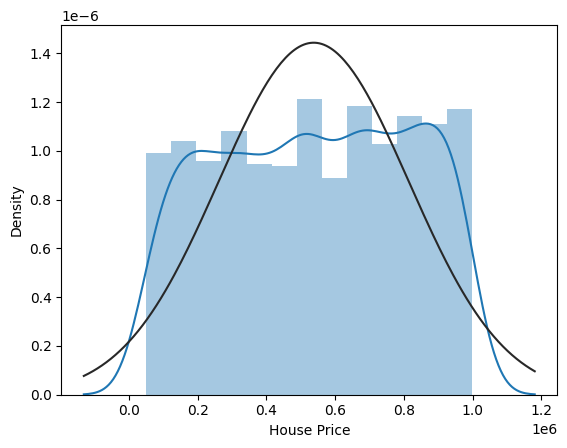

In [28]:
plt.xlabel("House Price")
sns.distplot(Y,fit=s.norm)